In [18]:
# modulos importantes para o trabalho

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy

***Sobre***

O trabalho consiste na análise usando o modulo MRPy de dados de vibrações coletados usando o aplicativo android "iNVH"
Os dados coletados correspondem a vibração de uma mesa por agitação intermitente.


**Introdução**

Começamos por inicializar os dados do sistema.



In [19]:
m  = 5.0       # system mass in kg
fn = 1.0       # natural frequency in Hz
zt = 0.01      # damping as ratio of critical
u0 = 0.        # initial displacement
v0 = 0.        # initial velocity


****Extraindo os dados****

Procedemos a leitura do arquivo dos dados plotando os dados dos três eixos de medição 
do acelerometro do aparelho

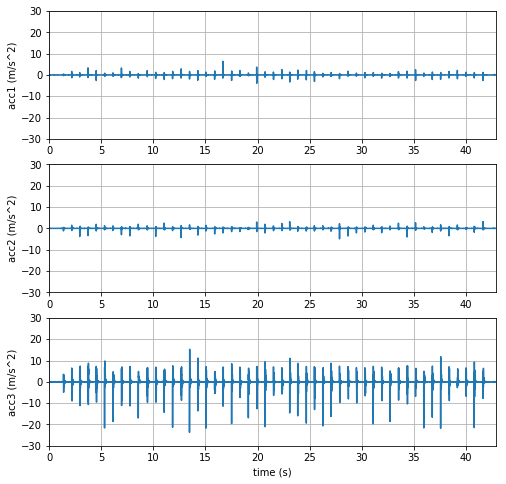

In [20]:
data = MRPy.from_file('dados/mesavibra', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(1, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-30, 30);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');


****Dados a_z****


Estraimos os dados da aceleração em _z_, que é o que nos interessa.

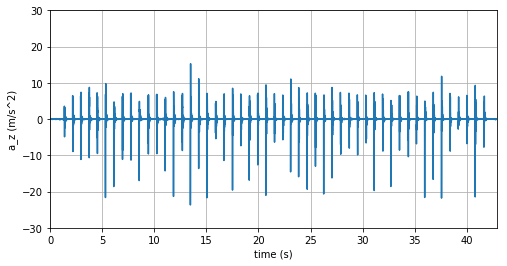

In [21]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-30, 30);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True)

**Periodograma dos dados de entrada**


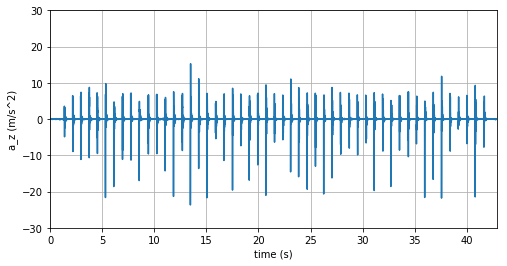

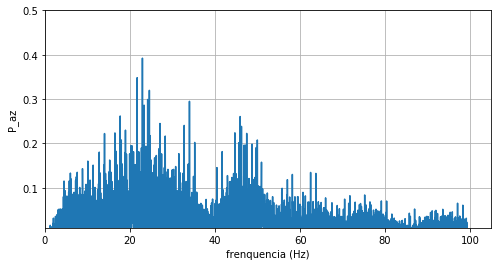

In [34]:
plt.figure(3, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-30, 30);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True)



P_az, fs = az.periodogram() #função periodograma
f = az.f_axis()
plt.figure(4, figsize=(8, 4), clear=True)
plt.plot(f, P_az[0])

plt.xlim(0, 105);  plt.xlabel('frenquencia (Hz)') 
plt.ylim(0.01, .5);   plt.ylabel('P_az') 

plt.grid(True)


Os dados da aceleração em _z_ obtidos foram usados como base de excitação obtendo-se soluções pelo metodo de diferenças finitas e de Duhamel.

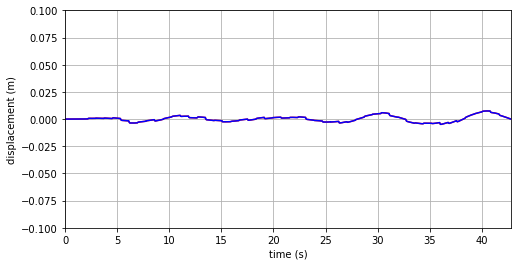

In [42]:
u_FD = az.sdof_fdiff  (fn, zt, u0, v0)/m
u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(t, u_FD[0], 'r', t, u_DH[0], 'b')

plt.xlim(0, az.Td);        plt.xlabel('time (s)') 
plt.ylim(-0.1, 0.1);   plt.ylabel('displacement (m)') 

plt.grid(True)

Uma compração em vista da obtenção do erro relativos dos dois metodos.

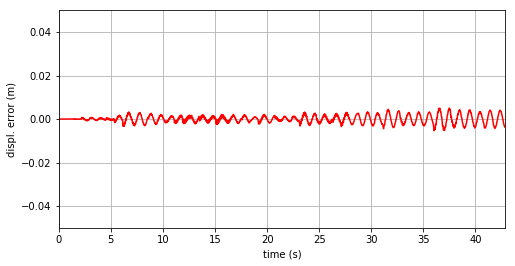

In [28]:
err = u_FD - u_DH

plt.figure(6, figsize=(8, 4), clear=True)
plt.plot(t, err[0], 'r')

plt.xlim(0, az.Td);        plt.xlabel('time (s)') 
plt.ylim(-0.05, 0.05);   plt.ylabel('displ. error (m)') 

plt.grid(True)


Geração do grafico de pseudo espectro.

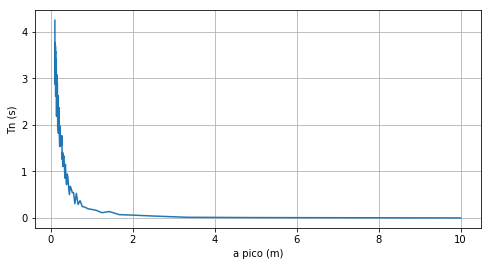

In [25]:
fn   =  np.linspace(0.1, 10, 100)


u_max = []

for i in fn:
    u_DH = az.sdof_Duhamel(i, zt, u0, v0)/m
    u_max.append(u_DH.max())

wn = [2*np.pi*i for i in fn]
wn2 = np.array(wn)**2
umax_ray = np.array(u_max)

a_pico = np.multiply(wn2, umax_ray)
#a_pico = np.array([wn*umax_ray])
tn = [2*np.pi/x for x in wn]
Tn = np.array(tn)
u_max = np.array(u_max)


plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(Tn, a_pico)

#plt.xlim(0.1, .5);        
plt.xlabel('a pico (m)') 
#plt.ylim(0.01, 5);   
plt.ylabel('Tn (s)') 

plt.grid(True)




**Periodograma Do Duhamel**


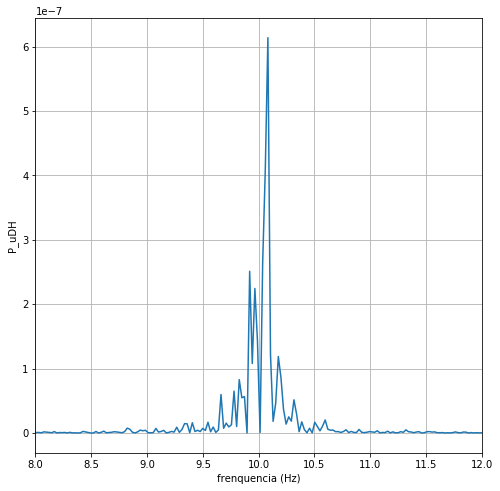

In [26]:
P_uDH, fs = u_DH.periodogram() #função periodograma
f = u_DH.f_axis()
plt.figure(8, figsize=(8, 8), clear=True)
plt.plot(f, P_uDH[0])

plt.xlim(8, 12);  plt.xlabel('frenquencia (Hz)') 
#plt.ylim(0, .2);   
plt.ylabel('P_uDH') 

plt.grid(True)